* Create your own K-means algorithm
* Analyze each dataset
* Does the data need to be normalized?
* Print the clusters using PCA


At the bottom of the document there is some experimentation with the mall_customers dataset. A dataset using OneHotEconder instead of LabelEncoder is produced and studied and at the bottom of the document there is an elbow chart produced for the mall_customer dataset aswell.

The data is normalized using MinMaxSclaer since the data is presented in different scales. If the data is not normalized it will lead to missrepresentation of the data, since attributes with larger valyes will have a greater effect on the resulting clusters than attributes with a smaller values.

### Importing necessary packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Importing the datasets

In [2]:
iris_df = pd.read_csv('../../Datasets/iris.csv')
mall_customers_df = pd.read_csv('../../Datasets/Mall_Customers.csv')
small_iris_df = pd.read_csv('../../Datasets/small_iris.csv')


# Small iris-dataset

#### Dataset overview

In [3]:
small_iris_df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [4]:
small_iris_df.shape

(150, 2)

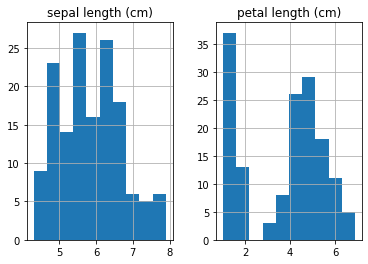

In [5]:
small_iris_df.hist();

#### There are no empty values in any of the columns

In [6]:
small_iris_df.isna().sum()

sepal length (cm)    0
petal length (cm)    0
dtype: int64

#### 27 duplicated entries can be found in the dataset. Only unique entries are kept

In [7]:
dupl = small_iris_df.duplicated().sum()
print(dupl)
small_iris_cleaned_df = small_iris_df.drop_duplicates()
print(f"Duplicates after removal: {small_iris_cleaned_df.duplicated().sum()}")

27
Duplicates after removal: 0


#### Max values of sepal and petal length

In [8]:
small_iris_cleaned_df.max()

sepal length (cm)    7.9
petal length (cm)    6.9
dtype: float64

#### Min values of sepal and petal length

In [9]:
small_iris_cleaned_df.min()

sepal length (cm)    4.3
petal length (cm)    1.0
dtype: float64

## K-means algorithm for the small iris_dataset.

Distance is calculated as "Euclidean"

*The cell containing information about the duplicated entries has to be run for the algorithm to work since it makes changes to the small iris dataset

Through testing setting the cluster amount to 3 is a good idea.

C:\Users\Axl_w\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Axl_w\AppData\Local\Temp/ipykernel_13928/2699869228.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Center'] = cluster_belonging
C:\Users\Axl_w\AppData\Local\Temp/ipykernel_13928/2699869228.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

Convergence reached after 2 iterations!
Inertia for 3 clusters: 2.4219630936048357


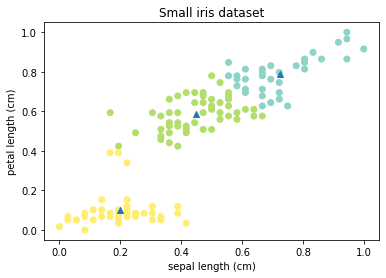

In [10]:
from sklearn.preprocessing import MinMaxScaler


#User settings:
K_clusters = 3
max_iter = 100
tolerance = 0.0001

data_size = small_iris_cleaned_df.shape[0]

scaler = MinMaxScaler()

headers = list(small_iris_cleaned_df)

#Rescaling the data 
small_iris_cleaned_df[headers] = scaler.fit_transform(small_iris_cleaned_df[headers])

#Tolerance test, a higher tolerance results in a faster runtime but gives a less accurate result
def toleranceTest(new, current, tolerance):
    diff = np.subtract(new,current)
    for i in diff:
        if i > tolerance:
            return False
    return True

#The main bulk of the clustering algorithm
def clusteringAlgorithm(df, max_iter,K_clusters):
    #Getting the row amount
    data_size = df.shape[0]
    cluster_center = []
    #Randomizing the initial clusters.
    np.random.seed(0)
    initial_cluster_centers_pos = np.random.choice(data_size,K_clusters,replace= False)
    #Getting initial cluster center values
    for k in initial_cluster_centers_pos:
        cluster_center.append(df.iloc[k])
    cluster_belonging = []
    #Going through the rows of data and assigning each point to its nearest center.
    for i in range(data_size):
        datapoint_center = euclideanCenter(cluster_center, df.iloc[i])
        cluster_belonging.append(datapoint_center)    
    df['Center'] = cluster_belonging
    #Looping through the data and moving the clustercenters each iteration
    for iteration in range(max_iter):
        cluster_belonging_iter = []
        cluster_center_ids = range(K_clusters)
        new_centers = []
        
        #Getting the new mean position of all values belongning to each cluster center
        for j in cluster_center_ids:
            mean_pos = df[df['Center']== j].mean()
            new_centers.append(mean_pos)
            
        #Calculating which cluster center each datapoint belongs to based on the new mean
        for i in range(data_size):
            datapoint_center = euclideanCenter(new_centers, df.iloc[i])
            cluster_belonging_iter.append(datapoint_center)
        #Updating the new center belongings
        df['Center'] = cluster_belonging_iter
        compare_new = []
        compare_prev = []
        #comparing the new cluster center location to the old one
        for h in range(len(new_centers)):
            for u in range(len(new_centers[0])-1):
                compare_new.append(new_centers[h][u])
                compare_prev.append(cluster_center[h][u])
        #If the difference between the new and the old positions are larger than the tolerance
        #a new iteration is started, otherwise the loop is ended
        test_tol = toleranceTest(compare_new,compare_prev, tolerance)
        if test_tol == True:
            print(f"Convergence reached after {iteration} iterations!")
            return df
        else:
            cluster_center = new_centers
            
#Function for calculation of cluster center locations. Euclidean distance
def euclideanCenter(cluster_centers, datapoint):
    distances = []
    if "Center" in datapoint:
        datapoint = datapoint.drop(labels = ["Center"])
    for i in cluster_centers:
        distance = i.sub(datapoint).pow(2).sum()
        distances.append(distance)
    min_val = min(distances)
    min_index = distances.index(min_val)
    return min_index

#Function for calculation of inertia (sum of distances)
def inertiaCalc(df_all, center_pos, center):
    inertia = center_pos.sub(df_all[df_all['Center'] == center]).pow(2).sum()
    inertia = inertia.drop("Center").sum()
    return inertia
    
final_df = clusteringAlgorithm(small_iris_cleaned_df,max_iter,K_clusters)



final_df_clusters = final_df['Center']

cluster_center_ids = final_df_clusters.unique()

final_center_pos=[]

sumOfInertia = 0

for j in cluster_center_ids:
    mean_pos = final_df[final_df['Center']== j].mean()
    final_center_pos.append(mean_pos)
    inertia = inertiaCalc(final_df, mean_pos, j)
    sumOfInertia = sumOfInertia + inertia

print(f"Inertia for {K_clusters} clusters: {sumOfInertia}")
    
plt.scatter(final_df['sepal length (cm)'], final_df['petal length (cm)'], c = final_df.Center, cmap = "Set3")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title("Small iris dataset")

X_means = []
Y_means = []

for i in range(K_clusters):
    X_means.append(final_center_pos[i][0])
    Y_means.append(final_center_pos[i][1])
plt.scatter(X_means, Y_means, marker = '^')
plt.show()

## Iris dataset

Dataset overview.

All variables are to be used, since they differ in scale a rescaling of the variables is approriate.


In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Datasize

In [12]:
iris_df.shape

(150, 4)

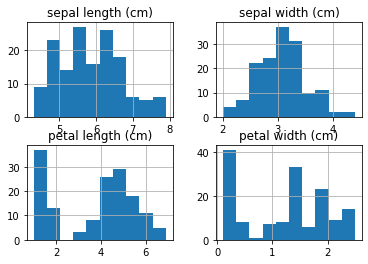

In [13]:
iris_df.hist();

#### There are no empty entries in the dataset

In [14]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#### One duplicated values can be found in the dataset

In [19]:
iris_df.duplicated().sum()
print(iris_df.duplicated().sum())
iris_df_cleaned_df = iris_df.drop_duplicates()
iris_df_cleaned_df.duplicated().sum()

1


0

#### Iris dataset max values

In [16]:
iris_df.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

#### Iris dataset min values

In [17]:
iris_df.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

### K-means algorithm iris dataset

C:\Users\Axl_w\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Convergence reached after 6 iterations!
Inertia for 4 clusters: 5.99291203738658


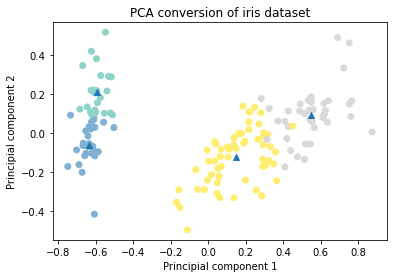

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
K_clusters = 4

max_iter = 100

tolerance = 0.001

distance = "Euclidean"

data_size = iris_df_cleaned_df.shape[0]

scaler = MinMaxScaler()

headers = list(iris_df_cleaned_df)

#Rescaling the data 


iris_df_cleaned_df[headers] = scaler.fit_transform(iris_df_cleaned_df[headers])

df = iris_df_cleaned_df.copy()

def toleranceTest(new, current, tolerance):
    diff = np.subtract(new,current)
    for i in diff:
        if i > tolerance:
            return False
    return True


def clusteringAlgorithm(df,max_iter):
    data_size = df.shape[0]
    cluster_center = []
    #Randomizing the initial clusters.
    np.random.seed(0)
    initial_cluster_centers_pos = np.random.choice(data_size,K_clusters,replace= False)
    #Getting initial cluster center positions
    for k in initial_cluster_centers_pos:
        cluster_center.append(df.iloc[k])
    cluster_belonging = []
    for i in range(data_size):
        datapoint_center = euclideanCenter(cluster_center, df.iloc[i])
        cluster_belonging.append(datapoint_center)    
    df['Center'] = cluster_belonging
    
    for iteration in range(max_iter):
        cluster_belonging = []
        cluster_center_ids = df['Center'].unique()
        new_centers = []
        for j in cluster_center_ids:
            mean_pos = df[df['Center']== j].mean()
            new_centers.append(mean_pos)
        for i in range(data_size):
            datapoint_center = euclideanCenter(new_centers, df.iloc[i])
            cluster_belonging.append(datapoint_center)
        df['Center'] = cluster_belonging
        compare_new = []
        compare_prev = []
        for h in range(len(new_centers)):
            for u in range(len(new_centers[0])-1):
                compare_new.append(new_centers[h][u])
                compare_prev.append(cluster_center[h][u])
        test_tol = toleranceTest(compare_new,compare_prev, tolerance)
        if test_tol == True:
            print(f"Convergence reached after {iteration} iterations!")
            return df
        else:
            cluster_center = new_centers

        
def euclideanCenter(cluster_centers, datapoint):
    distances = []
    if "Center" in datapoint:
        datapoint = datapoint.drop(labels = ["Center"])
    for i in cluster_centers:
        distance = i.sub(datapoint).pow(2).sum()
        distances.append(distance)
    min_val = min(distances)
    min_index = distances.index(min_val)
    return min_index

def pca_transform(df_data):
    pca = PCA(n_components = 2)
    principial_components = pca.fit_transform(df_data)
    principial_df = pd.DataFrame(data = principial_components,columns = ['pc 1', 'pc 2'])
    return principial_df

def inertiaCalc(df_all, center_pos, center):
    inertia = center_pos.sub(df_all[df_all['Center'] == center]).pow(2).sum()
    inertia = inertia.drop("Center").sum()
    return inertia


final_df = clusteringAlgorithm(df,max_iter)

final_df_clusters = final_df['Center']

cluster_center_ids = final_df['Center'].unique()

sumOfInertia = 0

for j in cluster_center_ids:
    mean_pos = final_df[final_df['Center']== j].mean()
    final_center_pos.append(mean_pos)
    inertia = inertiaCalc(final_df, mean_pos, j)
    sumOfInertia = sumOfInertia + inertia

print(f"Inertia for {K_clusters} clusters: {sumOfInertia}")


final_df_conversion = final_df.drop(columns = ['Center'])

test_pca = pca_transform(final_df_conversion)

test_pca['Center'] = final_df_clusters

cluster_center_ids_conv = test_pca['Center'].unique()

final_mean_pos=[]

for j in cluster_center_ids_conv:
    mean_pos = test_pca[test_pca['Center']== j].mean()
    final_mean_pos.append(mean_pos)

plt.scatter(test_pca['pc 1'], test_pca['pc 2'], c = test_pca.Center, cmap = "Set3")
plt.xlabel("Principial component 1")
plt.ylabel("Principial component 2")
plt.title("PCA conversion of iris dataset")

X_means = []
Y_means = []

for i in range(K_clusters):
    X_means.append(final_mean_pos[i][0])
    Y_means.append(final_mean_pos[i][1])
plt.scatter(X_means, Y_means, marker = '^')
plt.show()


Writing the K-means algorithm for the iris and Mall_customers dataset

## Mall_customers

Dataset overview.

The CustomerID columns can be removed as it is not an attribute that describes the data, it is just an arbitrary number given to the customers. 

The genders will be converted to 1s and 0s and the remaining attributes will be rescaled since they are not equal in range.

In [21]:
mall_customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Dataset size

In [22]:
mall_customers_df.shape

(200, 5)

#### Data overview

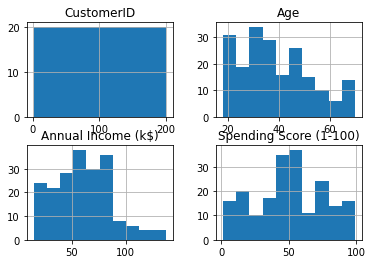

In [23]:
mall_customers_df.hist();

#### No missing entries are found in the data

In [24]:
mall_customers_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### No duplicated values can be found
Also droppping the customerIDs to check if there are any customers that have duplicate entries

In [25]:
mall_customers_df.duplicated().sum()
mall_customers_df_no_id = mall_customers_df.drop(columns = ['CustomerID'])
mall_customers_df_no_id.duplicated().sum()

0

#### Mall customers dataset max values

In [26]:
mall_customers_df.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

#### Mall customers dataset min values

In [27]:
mall_customers_df.min()

CustomerID                     1
Gender                    Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

### Using LabelEncoder to change the "Gender" values to numerical values
Changing the "Gender" attribute to 1s and 0s. 1 = Male, 0 = Female.

Removing the "CustomerID" label since it is nothing more than an ID.

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mall_customers_df = pd.read_csv('../../Datasets/Mall_Customers.csv')

mall_customers_df_mod = mall_customers_df.copy()
encode_gender = le.fit_transform(mall_customers_df_mod['Gender'])
mall_customers_df_mod['Gender'] = encode_gender

mall_customers_df_mod = mall_customers_df_mod.drop(columns = ["CustomerID"])
mall_customers_df_mod

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


The cell above must be run before the KMeans algorithm for it to work since it restructures the "mall_customers" dataset

Convergence reached after 9 iterations!
Inertia for 4 clusters: 22.46281616781907


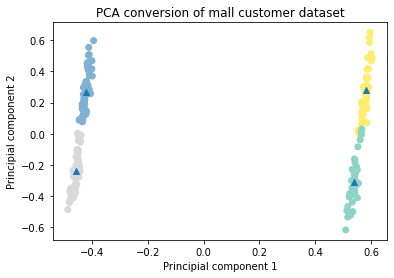

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#User settings
K_clusters = 4
max_iter = 100
tolerance = 0.01

data_size = mall_customers_df_mod.shape[0]

scaler = MinMaxScaler()
headers = list(mall_customers_df_mod)
#Rescaling the data 
mall_customers_df_mod[headers] = scaler.fit_transform(mall_customers_df_mod[headers])



#Error tolerancetest
def toleranceTest(new, current, tolerance):
    diff = np.subtract(new,current)
    for i in diff:
        if i > tolerance:
            return False
    return True


def clusteringAlgorithm(df, max_iter, tolerance):
    data_size = df.shape[0]
    cluster_center = []
    #Randomizing the initial clusters.
    np.random.seed(0)
    initial_cluster_centers_pos = np.random.choice(data_size,K_clusters,replace= False)
    #Getting the the positions of the initial clusters.
    for k in initial_cluster_centers_pos:
        cluster_center.append(df.iloc[k])
    cluster_belonging = []
    for i in range(data_size):
        datapoint_center = euclideanCenter(cluster_center, df.iloc[i])
        cluster_belonging.append(datapoint_center)    
    df['Center'] = cluster_belonging
    
    for iteration in range(max_iter):
        cluster_belonging = []
        cluster_center_ids = df['Center'].unique()
        new_centers = []
        for j in cluster_center_ids:
            mean_pos = df[df['Center']== j].mean()
            new_centers.append(mean_pos)
        for i in range(data_size):
            datapoint_center = euclideanCenter(new_centers, df.iloc[i])
            cluster_belonging.append(datapoint_center)
        df['Center'] = cluster_belonging
        compare_new = []
        compare_prev = []
        for h in range(len(new_centers)):
            for u in range(len(new_centers[0])-1):
                compare_new.append(new_centers[h][u])
                compare_prev.append(cluster_center[h][u])
        test_tol = toleranceTest(compare_new,compare_prev, tolerance)
        if test_tol == True:
            print(f"Convergence reached after {iteration} iterations!")
            return df
        else:
            cluster_center = new_centers
        
def euclideanCenter(cluster_centers, datapoint):
    distances = []
    if "Center" in datapoint:
        datapoint = datapoint.drop(labels = ["Center"])
    for i in cluster_centers:
        distance = i.sub(datapoint).pow(2).sum()
        distances.append(distance)
    min_val = min(distances)
    min_index = distances.index(min_val)
    return min_index

def pca_transform(df_data):
    pca = PCA(n_components = 2)
    principial_components = pca.fit_transform(df_data)
    principial_df = pd.DataFrame(data = principial_components,columns = ['pc 1', 'pc 2'])
    return principial_df

def inertiaCalc(df_all, center_pos, center):
    inertia = center_pos.sub(df_all[df_all['Center'] == center]).pow(2).sum()
    inertia = inertia.drop("Center").sum()
    return inertia

final_df = clusteringAlgorithm(mall_customers_df_mod, max_iter, tolerance)

final_df_clusters = final_df['Center']

final_df_conversion = final_df.drop(columns = ['Center'])

cluster_center_ids = final_df['Center'].unique()

sumOfInertia = 0

for j in cluster_center_ids:
    mean_pos = final_df[final_df['Center']== j].mean()
    final_center_pos.append(mean_pos)
    inertia = inertiaCalc(final_df, mean_pos, j)
    sumOfInertia = sumOfInertia + inertia

print(f"Inertia for {K_clusters} clusters: {sumOfInertia}")

test_pca = pca_transform(final_df_conversion)

test_pca['Center'] = final_df_clusters

cluster_center_ids_conv = test_pca['Center'].unique()

final_mean_pos=[]

for j in cluster_center_ids_conv:
    mean_pos = test_pca[test_pca['Center']== j].mean()
    final_mean_pos.append(mean_pos)

plt.scatter(test_pca['pc 1'], test_pca['pc 2'], c = test_pca.Center, cmap = "Set3")
plt.xlabel("Principial component 1")
plt.ylabel("Principial component 2")
plt.title("PCA conversion of mall customer dataset")

X_means = []
Y_means = []

for i in range(K_clusters):
    X_means.append(final_mean_pos[i][0])
    Y_means.append(final_mean_pos[i][1])
plt.scatter(X_means, Y_means, marker = '^')
plt.show()

Going through the clusters produced shows that all the Gender = 1 values are located in cluster 1 and 3. 

In [30]:
# Going through the data and investigating how the data is split, in the case of 4 cluster-centers, The male and female values are split
# and can be seen as the "strips" of data in the plot.

g1 = final_df[final_df["Gender"] == 1]

g1_c0 = final_df[(final_df["Gender"] == 1) & (final_df["Center"]==0)]

g1_c1 = final_df[(final_df["Gender"] == 1) & (final_df["Center"]==1)]

g1_c2 = final_df[(final_df["Gender"] == 1) & (final_df["Center"]==2)]

g1_c3 = final_df[(final_df["Gender"] == 1) & (final_df["Center"]==3)]
print(f"Gender = 1\n{g1}\nGender = 1, center 0\n{g1_c0}\nGender = 1, center 1\n{g1_c1}\n \
      Gender = 1, center 2\n{g1_c2}\nGender = 1, center 3{g1_c3}")

g1_c1_len = len(final_df[(final_df["Gender"] == 1) & (final_df["Center"]==3)])
g1_c3_len = len(final_df[(final_df["Gender"] == 1) & (final_df["Center"]==0)])

#Summarizing the amount of entries in center 3 and 0
total_c0_c3 = g1_c1_len+g1_c3_len
print(f"Length of {total_c0_c3}")

Gender = 1
     Gender       Age  Annual Income (k$)  Spending Score (1-100)  Center
0       1.0  0.019231            0.000000                0.387755       0
1       1.0  0.057692            0.000000                0.816327       0
8       1.0  0.884615            0.032787                0.020408       3
10      1.0  0.942308            0.032787                0.132653       3
14      1.0  0.365385            0.040984                0.122449       3
..      ...       ...                 ...                     ...     ...
187     1.0  0.192308            0.704918                0.683673       0
192     1.0  0.288462            0.803279                0.071429       3
197     1.0  0.269231            0.909836                0.744898       0
198     1.0  0.269231            1.000000                0.173469       3
199     1.0  0.230769            1.000000                0.836735       0

[88 rows x 5 columns]
Gender = 1, center 0
     Gender       Age  Annual Income (k$)  Spending Score

# ONEHOTENCODER TEST

In [31]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
mall_customers_df = pd.read_csv('../../Datasets/Mall_Customers.csv')

mall_customers_df_mod_OHE = mall_customers_df.copy()


print(mall_customers_df_mod_OHE)
mall_customers_df_test = pd.get_dummies(mall_customers_df_mod_OHE.Gender, prefix = "Gender")


mall_customers_df_mod_OHE=mall_customers_df_mod_OHE.drop(columns=["Gender", "CustomerID"])
mall_customers_df_mod_OHE =pd.concat([mall_customers_df_mod_OHE,mall_customers_df_test], axis=1)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


#### Result label encoder (4 clusters)
Convergence reached after 9 iterations!
Inertia for 4 clusters: 22.46281616781907

#### Result onehotencoder (4clusters)
Convergence reached after 7 iterations!
Inertia for 4 clusters: 22.462816167819078

The results are very similar inertia wise and the plots looks very similar. The onehotencoder data converges in less iterations.

Convergence reached after 7 iterations!
Inertia for 4 clusters: 22.462816167819078


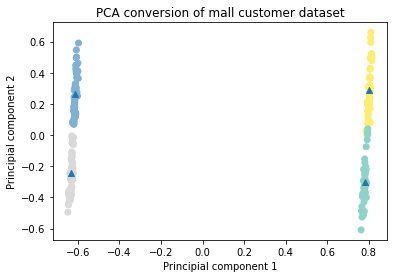

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#User settings
K_clusters = 4
max_iter = 100
tolerance = 0.01

data_size = mall_customers_df_mod_OHE.shape[0]

scaler = MinMaxScaler()
headers = list(mall_customers_df_mod_OHE)
#Rescaling the data 
mall_customers_df_mod_OHE[headers] = scaler.fit_transform(mall_customers_df_mod_OHE[headers])


#Error tolerancetest
def toleranceTest(new, current, tolerance):
    diff = np.subtract(new,current)
    for i in diff:
        if i > tolerance:
            return False
    return True


def clusteringAlgorithm(df, max_iter, tolerance):
    data_size = df.shape[0]
    cluster_center = []
    #Randomizing the initial clusters.
    np.random.seed(0)
    initial_cluster_centers_pos = np.random.choice(data_size,K_clusters,replace= False)
    #Getting the the positions of the initial clusters.
    for k in initial_cluster_centers_pos:
        cluster_center.append(df.iloc[k])
    cluster_belonging = []
    for i in range(data_size):
        datapoint_center = euclideanCenter(cluster_center, df.iloc[i])
        cluster_belonging.append(datapoint_center)    
    df['Center'] = cluster_belonging
    
    for iteration in range(max_iter):
        cluster_belonging = []
        cluster_center_ids = df['Center'].unique()
        new_centers = []
        for j in cluster_center_ids:
            mean_pos = df[df['Center']== j].mean()
            new_centers.append(mean_pos)
        for i in range(data_size):
            datapoint_center = euclideanCenter(new_centers, df.iloc[i])
            cluster_belonging.append(datapoint_center)
        df['Center'] = cluster_belonging
        compare_new = []
        compare_prev = []
        for h in range(len(new_centers)):
            for u in range(len(new_centers[0])-1):
                compare_new.append(new_centers[h][u])
                compare_prev.append(cluster_center[h][u])
        test_tol = toleranceTest(compare_new,compare_prev, tolerance)
        #if (compare_new == compare_prev):
        if test_tol == True:
            print(f"Convergence reached after {iteration} iterations!")
            return df
        else:
            cluster_center = new_centers
        
def euclideanCenter(cluster_centers, datapoint):
    distances = []
    if "Center" in datapoint:
        datapoint = datapoint.drop(labels = ["Center"])
    for i in cluster_centers:
        distance = i.sub(datapoint).pow(2).sum()
        distances.append(distance)
    min_val = min(distances)
    min_index = distances.index(min_val)
    return min_index

def pca_transform(df_data):
    pca = PCA(n_components = 2)
    principial_components = pca.fit_transform(df_data)
    principial_df = pd.DataFrame(data = principial_components,columns = ['pc 1', 'pc 2'])
    return principial_df

def inertiaCalc(df_all, center_pos, center):
    inertia = center_pos.sub(df_all[df_all['Center'] == center]).pow(2).sum()
    inertia = inertia.drop("Center").sum()
    return inertia

final_df = clusteringAlgorithm(mall_customers_df_mod_OHE, max_iter, tolerance)

final_df_clusters = final_df['Center']

cluster_center_ids = final_df['Center'].unique()

sumOfInertia = 0

for j in cluster_center_ids:
    mean_pos = final_df[final_df['Center']== j].mean()
    final_center_pos.append(mean_pos)
    inertia = inertiaCalc(final_df, mean_pos, j)
    sumOfInertia = sumOfInertia + inertia

print(f"Inertia for {K_clusters} clusters: {sumOfInertia}")

final_df_conversion = final_df.drop(columns = ['Center'])


test_pca = pca_transform(final_df_conversion)

test_pca['Center'] = final_df_clusters

cluster_center_ids_conv = test_pca['Center'].unique()

final_mean_pos=[]

for j in cluster_center_ids_conv:
    mean_pos = test_pca[test_pca['Center']== j].mean()
    final_mean_pos.append(mean_pos)

plt.scatter(test_pca['pc 1'], test_pca['pc 2'], c = test_pca.Center, cmap = "Set3")
plt.xlabel("Principial component 1")
plt.ylabel("Principial component 2")
plt.title("PCA conversion of mall customer dataset")

X_means = []
Y_means = []

for i in range(K_clusters):
    X_means.append(final_mean_pos[i][0])
    Y_means.append(final_mean_pos[i][1])
plt.scatter(X_means, Y_means, marker = '^')
plt.show()

## A very basic way of checking k-elbow for mall_customers...

[18]
Convergence reached after 1 iterations!
Inertia for 8 clusters: 86.68148216035945


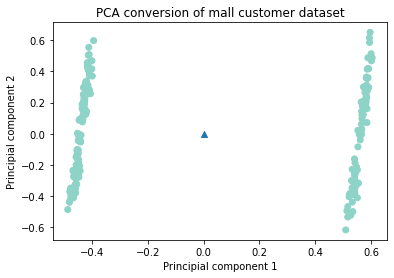

[ 18 170]
Convergence reached after 4 iterations!
Inertia for 8 clusters: 37.27227241211877


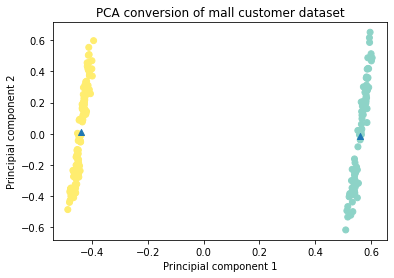

[ 18 170 107]
Convergence reached after 6 iterations!
Inertia for 8 clusters: 30.11037481210346


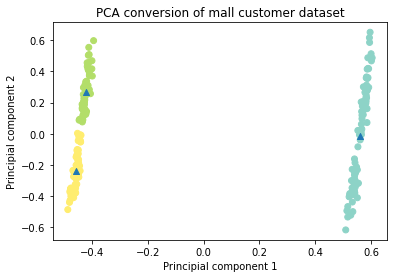

[ 18 170 107  98]
Convergence reached after 9 iterations!
Inertia for 8 clusters: 22.462816167819078


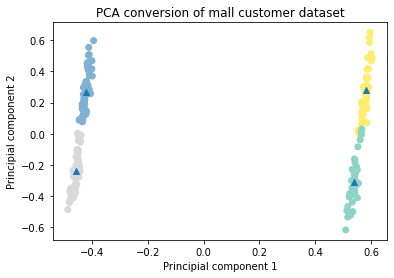

[ 18 170 107  98 177]
Convergence reached after 7 iterations!
Inertia for 8 clusters: 19.084318198750175


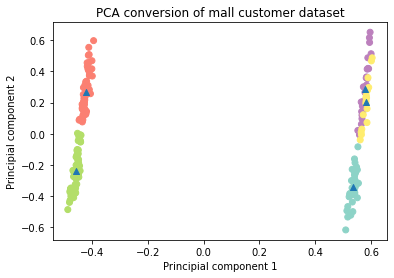

[ 18 170 107  98 177 182]
Convergence reached after 8 iterations!
Inertia for 8 clusters: 17.009616020757356


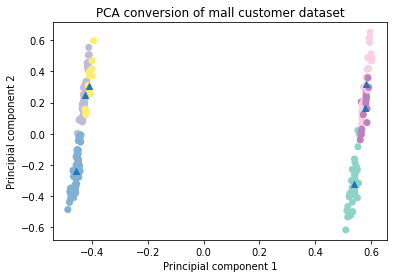

[ 18 170 107  98 177 182   5]
Convergence reached after 6 iterations!
Inertia for 8 clusters: 17.43134529287789


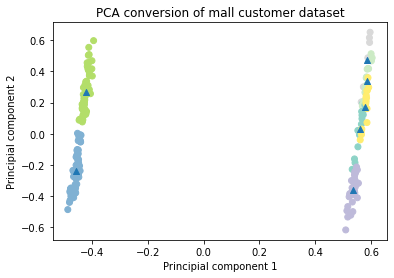

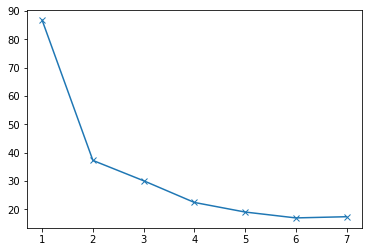

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#User settings
K_clusters = 8
max_iter = 100
tolerance = 0.01

data_size = mall_customers_df_mod.shape[0]

scaler = MinMaxScaler()
headers = list(mall_customers_df_mod)
#Rescaling the data 
mall_customers_df_mod[headers] = scaler.fit_transform(mall_customers_df_mod[headers])

inertias = []

#Error tolerancetest
def toleranceTest(new, current, tolerance):
    diff = np.subtract(new,current)
    for i in diff:
        if i > tolerance:
            return False
    return True


def clusteringAlgorithm(df, max_iter, tolerance, K_clusters):
    data_size = df.shape[0]
    cluster_center = []
    #Randomizing the initial clusters.
    np.random.seed(0)
    initial_cluster_centers_pos = np.random.choice(data_size,K_clusters,replace= False)
    #Getting the the positions of the initial clusters.
    for k in initial_cluster_centers_pos:
        cluster_center.append(df.iloc[k])

    cluster_belonging = []
    for i in range(data_size):
        datapoint_center = euclideanCenter(cluster_center, df.iloc[i])
        cluster_belonging.append(datapoint_center)    
    df['Center'] = cluster_belonging
    
    for iteration in range(max_iter):
        cluster_belonging = []
        cluster_center_ids = df['Center'].unique()
        new_centers = []
        for j in cluster_center_ids:
            mean_pos = df[df['Center']== j].mean()
            new_centers.append(mean_pos)
        for i in range(data_size):
            datapoint_center = euclideanCenter(new_centers, df.iloc[i])
            cluster_belonging.append(datapoint_center)
        df['Center'] = cluster_belonging
        compare_new = []
        compare_prev = []
        for h in range(len(new_centers)):
            for u in range(len(new_centers[0])-1):
                compare_new.append(new_centers[h][u])
                compare_prev.append(cluster_center[h][u])
        test_tol = toleranceTest(compare_new,compare_prev, tolerance)
        if test_tol == True:
            print(f"Convergence reached after {iteration} iterations!")
            return df
        else:
            cluster_center = new_centers
        
def euclideanCenter(cluster_centers, datapoint):
    distances = []
    if "Center" in datapoint:
        datapoint = datapoint.drop(labels = ["Center"])
    for i in cluster_centers:
        distance = i.sub(datapoint).pow(2).sum()
        distances.append(distance)
    min_val = min(distances)
    min_index = distances.index(min_val)
    return min_index

def pca_transform(df_data):
    pca = PCA(n_components = 2)
    principial_components = pca.fit_transform(df_data)
    principial_df = pd.DataFrame(data = principial_components,columns = ['pc 1', 'pc 2'])
    return principial_df

def inertiaCalc(df_all, center_pos, center):
    inertia = center_pos.sub(df_all[df_all['Center'] == center]).pow(2).sum()
    inertia = inertia.drop("Center").sum()
    return inertia

for p in range(1,K_clusters):

    final_df = clusteringAlgorithm(mall_customers_df_mod, max_iter, tolerance,p)

    final_df_clusters = final_df['Center']

    final_df_conversion = final_df.drop(columns = ['Center'])

    cluster_center_ids = final_df['Center'].unique()

    sumOfInertia = 0

    for j in cluster_center_ids:
        mean_pos = final_df[final_df['Center']== j].mean()
        final_center_pos.append(mean_pos)
        inertia = inertiaCalc(final_df, mean_pos, j)
        sumOfInertia = sumOfInertia + inertia

    print(f"Inertia for {K_clusters} clusters: {sumOfInertia}")
    inertias.append(sumOfInertia)
    test_pca = pca_transform(final_df_conversion)

    test_pca['Center'] = final_df_clusters

    cluster_center_ids_conv = test_pca['Center'].unique()

    final_mean_pos=[]

    for j in cluster_center_ids_conv:
        mean_pos = test_pca[test_pca['Center']== j].mean()
        final_mean_pos.append(mean_pos)

    plt.scatter(test_pca['pc 1'], test_pca['pc 2'], c = test_pca.Center, cmap = "Set3")
    plt.xlabel("Principial component 1")
    plt.ylabel("Principial component 2")
    plt.title("PCA conversion of mall customer dataset")

    X_means = []
    Y_means = []

    for i in range(p):
        X_means.append(final_mean_pos[i][0])
        Y_means.append(final_mean_pos[i][1])
    plt.scatter(X_means, Y_means, marker = '^')
    plt.show()
    

k_val = [*range(1,K_clusters)]
plt.plot(k_val, inertias, '-x')
plt.title("Elbow plot")
plt.xlabel("K-clusters")
plt.ylabel("Inertia")
plt.show()